# Business Objective

The business objective of this project is to perform customer segmentation using clustering analysis to identify distinct customer groups based on their demographic, behavioral, and transactional characteristics. The goal is to gain a deeper understanding of the company's ideal customers and tailor products, marketing campaigns, and promotions to meet the specific needs and preferences of each customer segment.

# COSTOMER SEGMENTATION

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('marketing_campaign1 (1).xlsx')

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df.shape

(2240, 29)

# Data Cleaning

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Dt_Customer'].value_counts()

2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: Dt_Customer, Length: 663, dtype: int64

In [9]:
df.dropna(inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [13]:
# Replace '2n Cycle' with 'n_Cycle'
df['Education'] = df['Education'].replace('2n Cycle', 'n_Cycle')

In [14]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
n_Cycle        200
Basic           54
Name: Education, dtype: int64

In [15]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [16]:
df['Dt_Customer'].value_counts()

2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2014-05-09     1
2013-06-26     1
2014-01-09     1
Name: Dt_Customer, Length: 662, dtype: int64

In [17]:
# Converting date into year 
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,2014


In [18]:
# Move the 'Dt_Customer_Year' column next to 'Dt_Customer'
df.insert(df.columns.get_loc('Dt_Customer') + 1, 'Dt_Customer_Year', df.pop('Dt_Customer_Year'))


In [19]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Dt_Customer_Year,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,2014,8,...,3,0,0,0,0,0,0,3,11,0


In [20]:
# Converting date into month 
df['Dt_Customer_month'] = df['Dt_Customer'].dt.month
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Dt_Customer_Year,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_month
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,2012,58,...,0,0,0,0,0,0,3,11,1,9
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,2014,38,...,0,0,0,0,0,0,3,11,0,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,2013,26,...,0,0,0,0,0,0,3,11,0,8
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,2014,26,...,0,0,0,0,0,0,3,11,0,2
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,2014,94,...,0,0,0,0,0,0,3,11,0,1


In [21]:
# Move the 'Dt_Customer_Year' column next to 'Dt_Customer_month'
df.insert(df.columns.get_loc('Dt_Customer_Year') + 1, 'Dt_Customer_month', df.pop('Dt_Customer_month'))


In [22]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Dt_Customer_Year,Dt_Customer_month,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,2012,9,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,2014,3,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,2013,8,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,2014,2,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,2014,1,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,2013,6,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,2014,6,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,2014,1,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,2014,1,...,3,0,0,0,0,0,0,3,11,0


In [23]:
# Converting date into day 
df['Dt_Customer_day'] = df['Dt_Customer'].dt.day
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Dt_Customer_Year,Dt_Customer_month,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_day
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,2012,9,...,0,0,0,0,0,0,3,11,1,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,2014,3,...,0,0,0,0,0,0,3,11,0,8
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,2013,8,...,0,0,0,0,0,0,3,11,0,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,2014,2,...,0,0,0,0,0,0,3,11,0,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,2014,1,...,0,0,0,0,0,0,3,11,0,19


In [24]:
# Move the 'Dt_Customer_month' column next to 'Dt_Customer_day'
df.insert(df.columns.get_loc('Dt_Customer_month') + 1, 'Dt_Customer_day', df.pop('Dt_Customer_day'))


In [25]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Dt_Customer_Year,Dt_Customer_month,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,2012,9,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,2014,3,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,2013,8,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,2014,2,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,2014,1,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,2013,6,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,2014,6,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,2014,1,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,2014,1,...,3,0,0,0,0,0,0,3,11,0


# Data Visualization

In [26]:
df['NumWebVisitsMonth'].value_counts()

7     387
8     340
6     335
5     279
4     217
3     203
2     201
1     150
9      82
0      10
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64

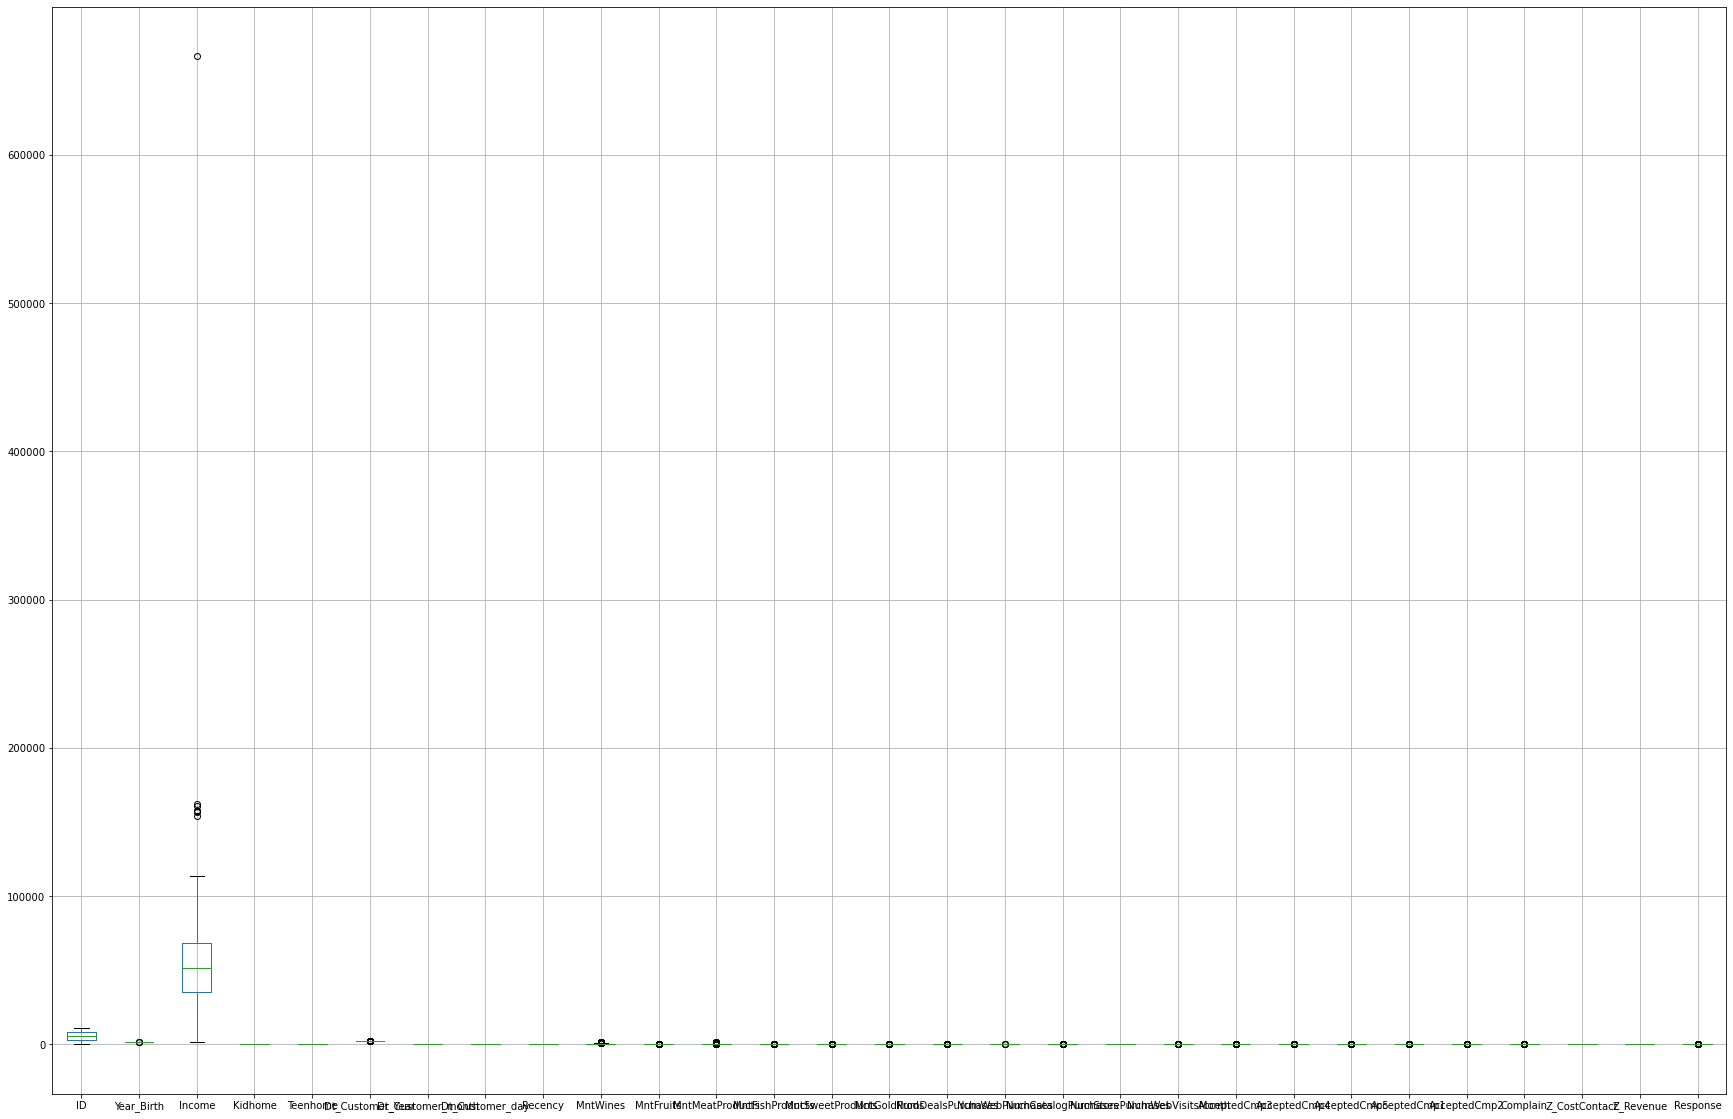

In [27]:
plt.figure(figsize=(30,20))
df.boxplot()
plt.show()

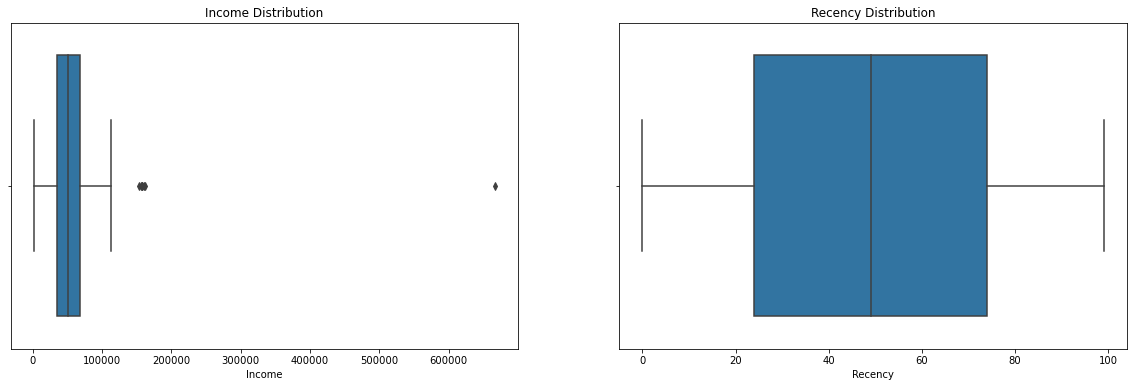

In [28]:
#  Box Plots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

sns.boxplot(x='Income', data=df, ax=axs[0])
axs[0].set_title('Income Distribution')

sns.boxplot(x='Recency', data=df, ax=axs[1])
axs[1].set_title('Recency Distribution')
plt.show()

<Figure size 720x576 with 0 Axes>

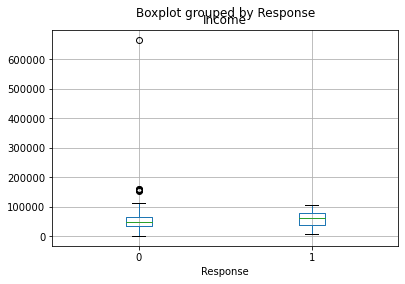

In [29]:

#Analysing by using boxplot diagram between 'Income and 'Response'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='Income', by='Response')
fig.suptitle('Income Distribution', fontsize=10, fontweight='bold')
plt.show()

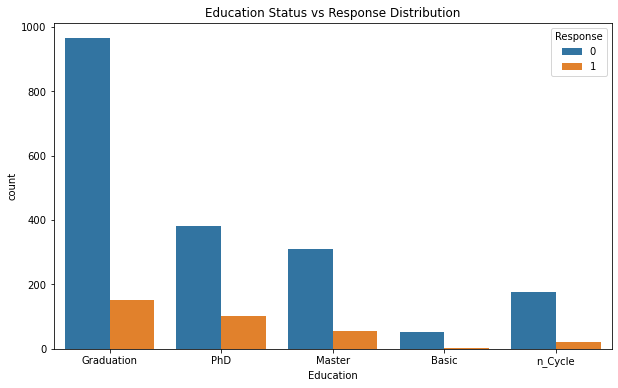

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Response',data=df)
plt.title('Education Status vs Response Distribution')
plt.show()

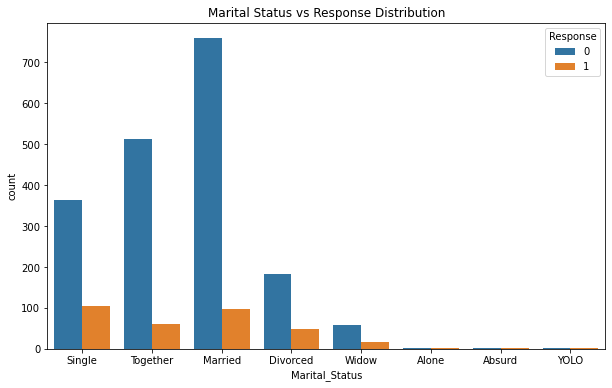

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status',hue='Response', data=df)
plt.title('Marital Status vs Response Distribution')
plt.show()

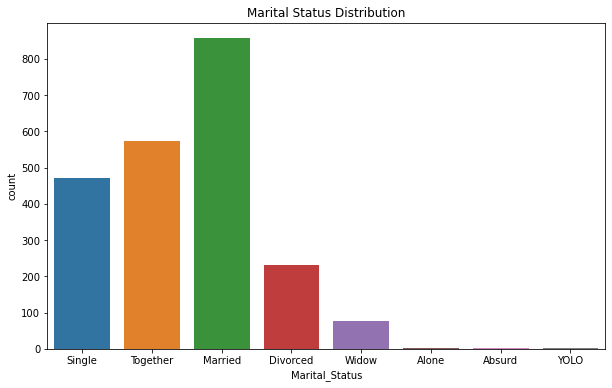

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status Distribution')
plt.show()

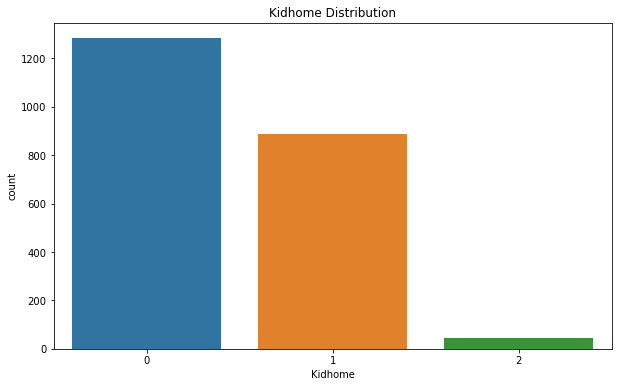

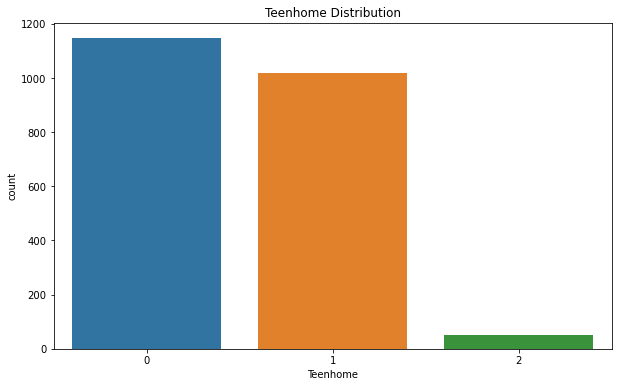

In [33]:
# Count Plots
plt.figure(figsize=(10, 6))
sns.countplot(x='Kidhome', data=df)
plt.title('Kidhome Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Teenhome', data=df)
plt.title('Teenhome Distribution')
plt.show()

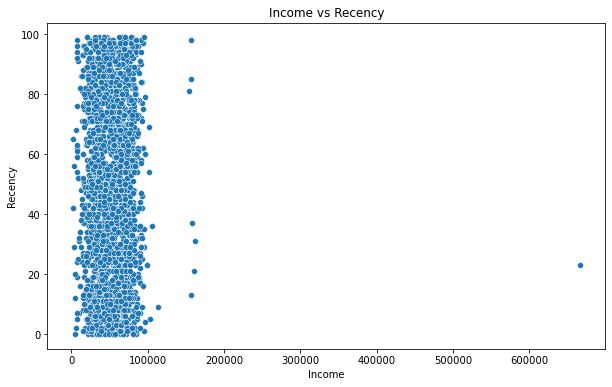

In [34]:
#  Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Recency', data=df)
plt.title('Income vs Recency')
plt.show()


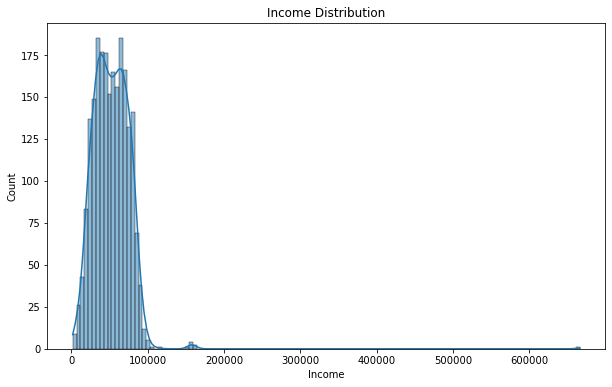

In [35]:
#  Histograms
plt.figure(figsize=(10, 6))
sns.histplot(x='Income', data=df, kde=True)
plt.title('Income Distribution')
plt.show()

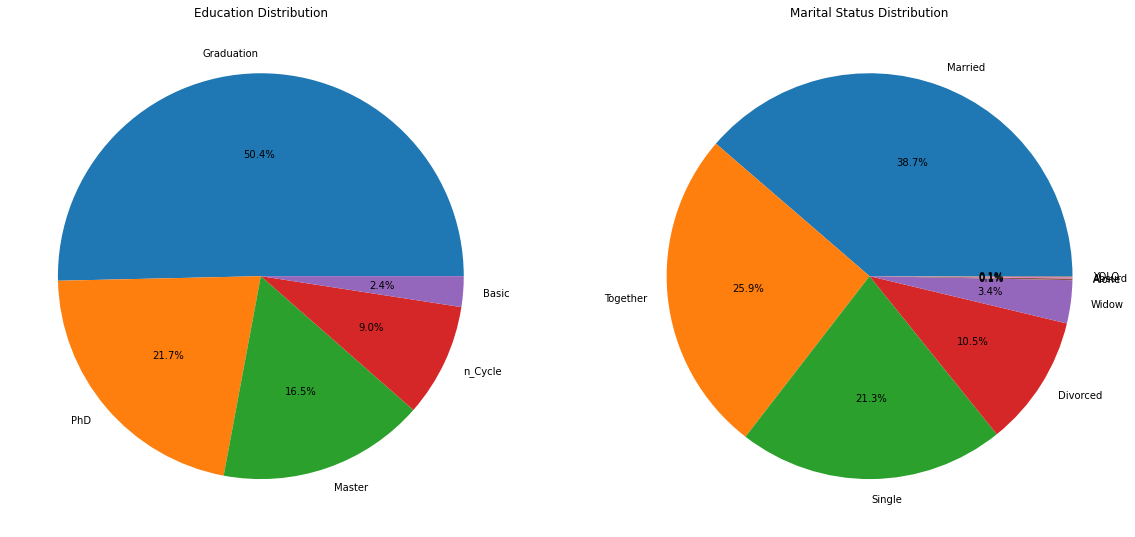

In [36]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 15))

# Education
axs[0].pie(df['Education'].value_counts(), labels = df['Education'].value_counts().index, autopct='%1.1f%%')
axs[0].set_title('Education Distribution')

# Marital_Status
axs[1].pie(df['Marital_Status'].value_counts(), labels = df['Marital_Status'].value_counts().index, autopct='%1.1f%%')
axs[1].set_title('Marital Status Distribution')

plt.show()

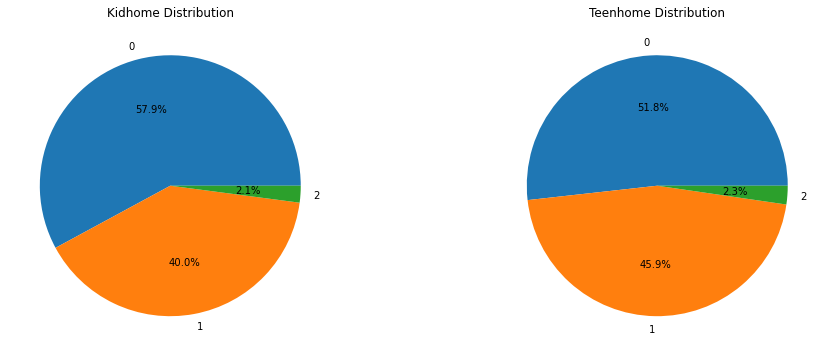

In [37]:
# Create another figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Kidhome
axs[0].pie(df['Kidhome'].value_counts(), labels = df['Kidhome'].value_counts().index, autopct='%1.1f%%')
axs[0].set_title('Kidhome Distribution')

# Teenhome
axs[1].pie(df['Teenhome'].value_counts(), labels = df['Teenhome'].value_counts().index, autopct='%1.1f%%')
axs[1].set_title('Teenhome Distribution')

plt.show()

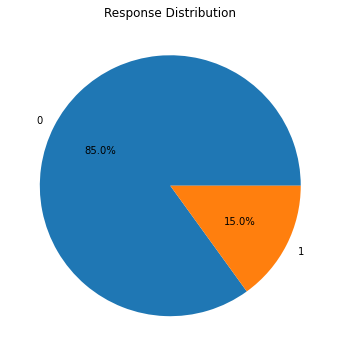

In [38]:
plt.figure(figsize=(8, 6))
plt.pie(df['Response'].value_counts(), labels = df['Response'].value_counts().index, autopct='%1.1f%%')
plt.title('Response Distribution')
plt.show()

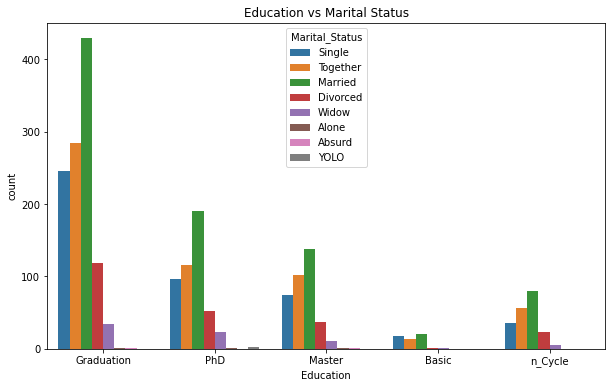

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Education", hue="Marital_Status", data=df)
plt.title("Education vs Marital Status")
plt.show()

In [40]:
df.groupby(['Education', 'Marital_Status']).size().reset_index(name='Count')

,Education,Marital_Status,Count
0,Basic,Divorced,1
1,Basic,Married,20
2,Basic,Single,18
3,Basic,Together,14
4,Basic,Widow,1
5,Graduation,Absurd,1
6,Graduation,Alone,1
7,Graduation,Divorced,119
8,Graduation,Married,429
9,Graduation,Single,246


In [41]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Dt_Customer_Year', 'Dt_Customer_month',
       'Dt_Customer_day', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

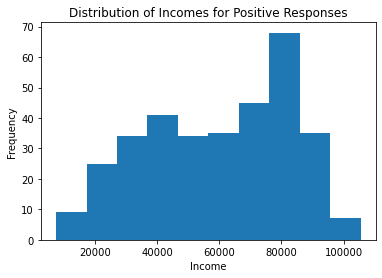

In [42]:
# Calculate the average income of customers who responded positively (Response = 1)
positive_response_incomes = df[df['Response'] == 1]['Income']
plt.hist(positive_response_incomes, bins=10)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Incomes for Positive Responses')
plt.show()

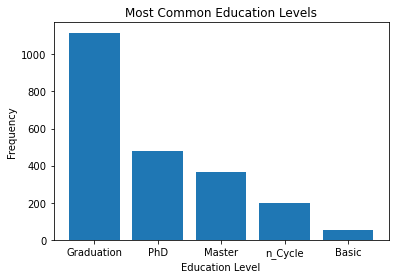

In [43]:
# Find a most common Education Levels
education_counts = df['Education'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Most Common Education Levels')
plt.show()

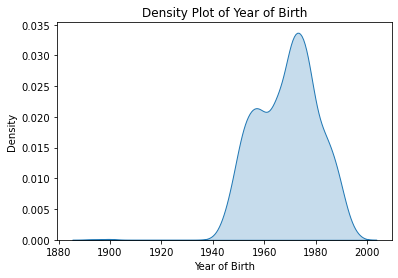

In [44]:
sns.kdeplot(df['Year_Birth'], shade=True)
plt.title('Density Plot of Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Density')
plt.show()

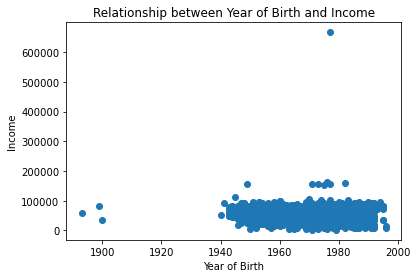

In [45]:
plt.scatter(df['Year_Birth'], df['Income'])
plt.title('Relationship between Year of Birth and Income')
plt.xlabel('Year of Birth')
plt.ylabel('Income')
plt.show()

In [46]:
# Group by year and calculate the mean income for each year
yearly_income = df.groupby('Dt_Customer_Year')['Income'].mean().reset_index()
print(yearly_income)

   Dt_Customer_Year        Income
0              2012  51150.236735
1              2013  52432.057971
2              2014  52827.285714


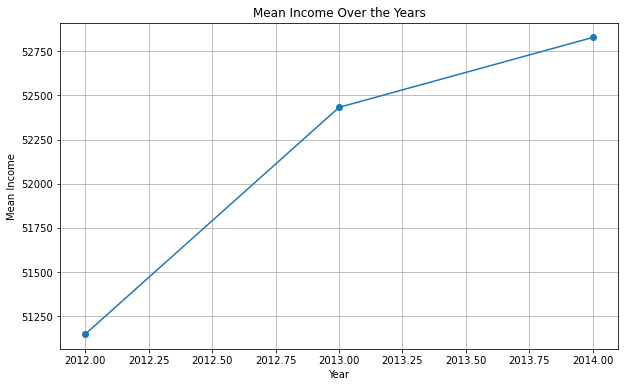

In [47]:
# Plotting
plt.figure(figsize=(10,6))
plt.plot(yearly_income['Dt_Customer_Year'], yearly_income['Income'], marker='o')
plt.title('Mean Income Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Income')
plt.grid(True)
plt.show()

In [48]:
# Group by month and count the number of customers for each month
monthly_customers = df['Dt_Customer_month'].value_counts().sort_index()
print(monthly_customers)

1     195
2     177
3     209
4     181
5     213
6     163
7     100
8     219
9     191
10    210
11    183
12    175
Name: Dt_Customer_month, dtype: int64


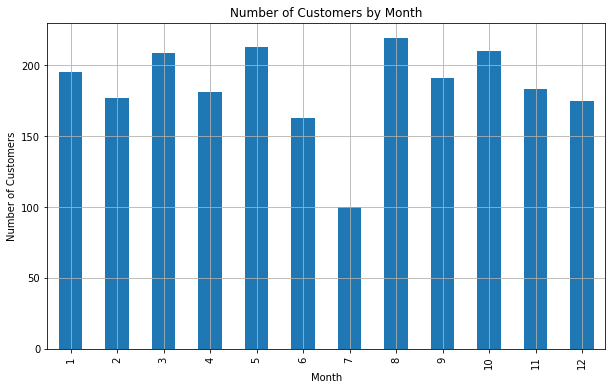

In [49]:
# Plotting
plt.figure(figsize=(10,6))
monthly_customers.plot(kind='bar')
plt.title('Number of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

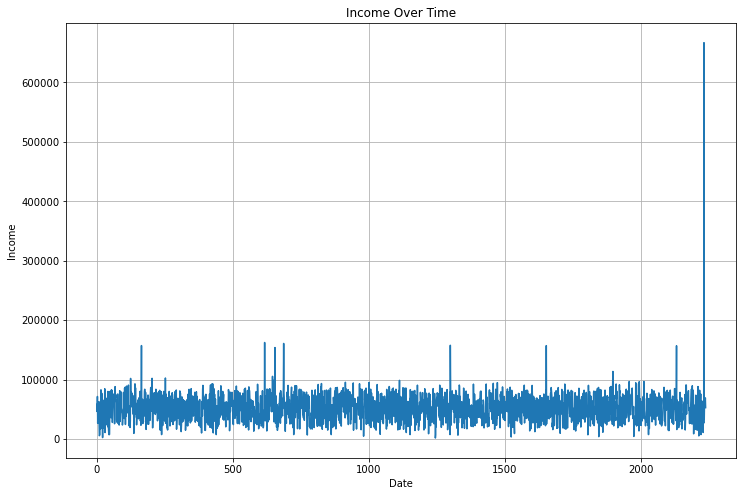

In [50]:
# Plotting
plt.figure(figsize=(12,8))
plt.plot(df['Income'])
plt.title('Income Over Time')
plt.xlabel('Date')
plt.ylabel('Income')
plt.grid(True)
plt.show()

In [51]:
# Calculate the average income of customers who responded positively (Response = 1)
avg_income_positive_response = df[df['Response'] == 1]['Income'].mean()
print(f"Average income of customers with positive response: {avg_income_positive_response:.2f}")

Average income of customers with positive response: 60209.68


In [52]:
# Find the most common education level among customers
most_common_education = df['Education'].mode().values[0]
print(f"Most common education level: {most_common_education}")

Most common education level: Graduation


In [53]:
# Calculate the percentage of customers who have kids at home
kidhome_percentage = (df['Kidhome'].sum() / len(df)) * 100
print(f"Percentage of customers with kids at home: {kidhome_percentage:.2f}%")

Percentage of customers with kids at home: 44.18%


In [54]:
df['Income'].min()

1730.0

In [55]:
df.shape

(2216, 32)

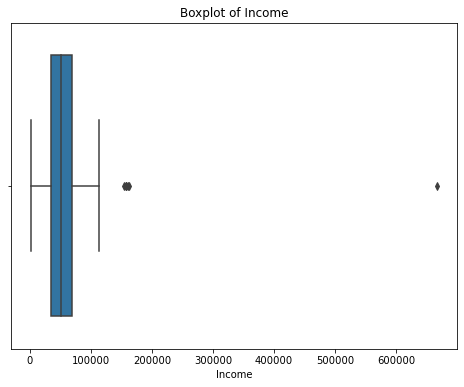

In [56]:
# Boxplot of Income
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')
plt.show()


# Removing Outliers

In [57]:
# Calculate the lower and upper case for outliers
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_case = Q1 - 1.5 * IQR
upper_case = Q3 + 1.5 * IQR


In [58]:
# Print the bounds
print(f"Lower case: {lower_case}")
print(f"Upper case: {upper_case}")

Lower case: -14525.5
Upper case: 118350.5


In [59]:
# Remove outliers
df = df[(df['Income'] >= lower_case) & (df['Income'] <= upper_case)]


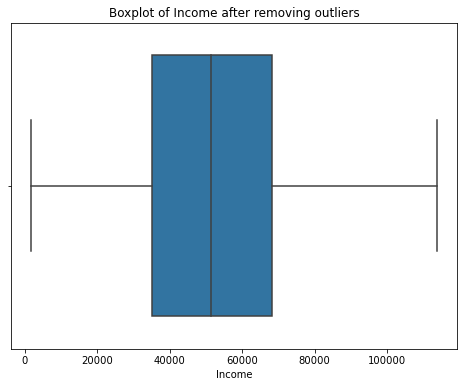

In [60]:
# Boxplot of Income after removing outliers
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income after removing outliers')
plt.show()

In [61]:
# Create new columns for TotalSpent and TotalPurchases

# Note :-- These columns represent the amount spent on different products. We may want to consider aggregating these columns into a single column, such as TotalSpent.

# 'Total_Time_Spent' column is created by summing up the time spent on purchasing different products
df['Total_Time_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Note :-- These columns represent the number of purchases made through different channels. We may want to consider aggregating these columns into a single column, such as TotalPurchases.

# 'TotalPurchases' column is created by summing up the number of purchases made through different channels
df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_12052\1253297686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Time_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12052\1253297686.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPurchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)


In [62]:
#Age of customer today 
df["Age"] = 2024-df["Year_Birth"]

# Move the 'Year_Birth' column next to 'Age'
df.insert(df.columns.get_loc('Year_Birth') + 1, 'Age', df.pop('Age'))

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

# Move the 'Kidhome' column next to 'Children'
df.insert(df.columns.get_loc('Kidhome') + 1, 'Children', df.pop('Children'))


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12052\1100586967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = 2024-df["Year_Birth"]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12052\1100586967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Children"]=df["Kidhome"]+df["Teenhome"]


In [63]:
df

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Children,Teenhome,Dt_Customer,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Time_Spent,TotalPurchases
0,5524,1957,67,Graduation,Single,58138.0,0,0,0,2012-09-04,...,0,0,0,0,0,3,11,1,1617,25
1,2174,1954,70,Graduation,Single,46344.0,1,2,1,2014-03-08,...,0,0,0,0,0,3,11,0,27,6
2,4141,1965,59,Graduation,Together,71613.0,0,0,0,2013-08-21,...,0,0,0,0,0,3,11,0,776,21
3,6182,1984,40,Graduation,Together,26646.0,1,1,0,2014-02-10,...,0,0,0,0,0,3,11,0,53,8
4,5324,1981,43,PhD,Married,58293.0,1,1,0,2014-01-19,...,0,0,0,0,0,3,11,0,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,Graduation,Married,61223.0,0,1,1,2013-06-13,...,0,0,0,0,0,3,11,0,1341,18
2236,4001,1946,78,PhD,Together,64014.0,2,3,1,2014-06-10,...,0,0,1,0,0,3,11,0,444,22
2237,7270,1981,43,Graduation,Divorced,56981.0,0,0,0,2014-01-25,...,1,0,0,0,0,3,11,0,1241,19
2238,8235,1956,68,Master,Together,69245.0,0,1,1,2014-01-24,...,0,0,0,0,0,3,11,0,843,23


Text(0, 0.5, 'Income')

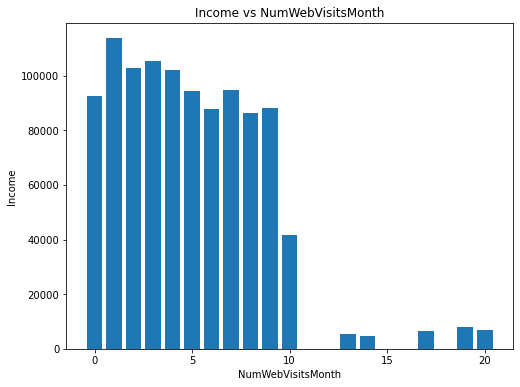

In [64]:
# Create a figure and axis
plt.figure(figsize=(8, 6))
# Plot Income vs NumWebVisitsMonth
plt.bar(df['NumWebVisitsMonth'], df['Income'])
plt.title('Income vs NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Income')

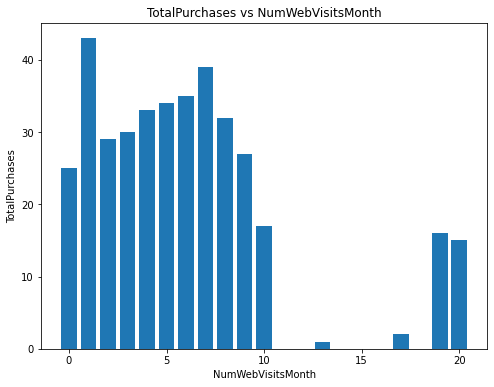

In [65]:
# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plot TotalPurchases vs NumWebVisitsMonth
plt.bar(df['NumWebVisitsMonth'], df['TotalPurchases'])
plt.title('TotalPurchases vs NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('TotalPurchases')

# Show the plot
plt.show()

Text(0, 0.5, 'Total_Time_Spent')

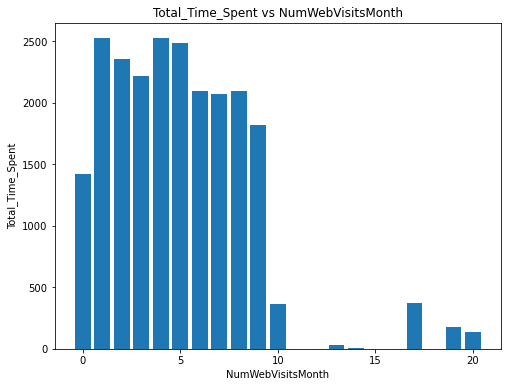

In [66]:
# Create a figure and axis
plt.figure(figsize=(8, 6))

# Plot Total_Time_Spent vs NumWebVisitsMonth
plt.bar(df['NumWebVisitsMonth'], df['Total_Time_Spent'])
plt.title('Total_Time_Spent vs NumWebVisitsMonth')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('Total_Time_Spent')

In [67]:
df.shape

(2208, 36)

-- ID: This column is a unique identifier for each customer and does not provide any meaningful information for modeling
    
-- Dt_Customer: This column represents the date when the customer was acquired, which may not be relevant for modeling
     
        Note-- However, the Dt_Customer_Year, Dt_Customer_month, and Dt_Customer_day columns can be useful, So i droped DT_Customer

    
-- AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2: These columns represent the customer's response to different marketing campaigns. Since the response is already captured in the Response column    
    
-- Complain: This column does not provide any meaningful information for  modeling    
  
    
    
    
    
    
    
    
    
    

In [68]:
# assuming df is the original dataset
df = df.drop(['ID', 'Z_CostContact','Year_Birth','Kidhome','Teenhome','Z_Revenue','Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain','Response'], axis=1)
print(df.head())

   Age   Education Marital_Status   Income  Children  Dt_Customer_Year  \
0   67  Graduation         Single  58138.0         0              2012   
1   70  Graduation         Single  46344.0         2              2014   
2   59  Graduation       Together  71613.0         0              2013   
3   40  Graduation       Together  26646.0         1              2014   
4   43         PhD        Married  58293.0         1              2014   

   Dt_Customer_month  Dt_Customer_day  Recency  MntWines  ...  \
0                  9                4       58       635  ...   
1                  3                8       38        11  ...   
2                  8               21       26       426  ...   
3                  2               10       26        11  ...   
4                  1               19       94       173  ...   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2

In [69]:
# Drop the original columns
df = df.drop(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], axis=1)
print(df.head())

   Age   Education Marital_Status   Income  Children  Dt_Customer_Year  \
0   67  Graduation         Single  58138.0         0              2012   
1   70  Graduation         Single  46344.0         2              2014   
2   59  Graduation       Together  71613.0         0              2013   
3   40  Graduation       Together  26646.0         1              2014   
4   43         PhD        Married  58293.0         1              2014   

   Dt_Customer_month  Dt_Customer_day  Recency  NumWebVisitsMonth  \
0                  9                4       58                  7   
1                  3                8       38                  5   
2                  8               21       26                  4   
3                  2               10       26                  6   
4                  1               19       94                  5   

   Total_Time_Spent  TotalPurchases  
0              1617              25  
1                27               6  
2               776       

In [70]:
# Move the 'Total_Time_Spent' column next to 'Recency'
df.insert(df.columns.get_loc('Recency') + 1, 'Total_Time_Spent', df.pop('Total_Time_Spent'))


In [71]:
# Move the 'TotalPurchases' column next to 'Total_Time_Spent'
df.insert(df.columns.get_loc('Total_Time_Spent') + 1, 'TotalPurchases', df.pop('TotalPurchases'))


In [72]:
df

,Age,Education,Marital_Status,Income,Children,Dt_Customer_Year,Dt_Customer_month,Dt_Customer_day,Recency,Total_Time_Spent,TotalPurchases,NumWebVisitsMonth
0,67,Graduation,Single,58138.0,0,2012,9,4,58,1617,25,7
1,70,Graduation,Single,46344.0,2,2014,3,8,38,27,6,5
2,59,Graduation,Together,71613.0,0,2013,8,21,26,776,21,4
3,40,Graduation,Together,26646.0,1,2014,2,10,26,53,8,6
4,43,PhD,Married,58293.0,1,2014,1,19,94,422,19,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,Graduation,Married,61223.0,1,2013,6,13,46,1341,18,5
2236,78,PhD,Together,64014.0,3,2014,6,10,56,444,22,7
2237,43,Graduation,Divorced,56981.0,0,2014,1,25,91,1241,19,6
2238,68,Master,Together,69245.0,1,2014,1,24,8,843,23,3


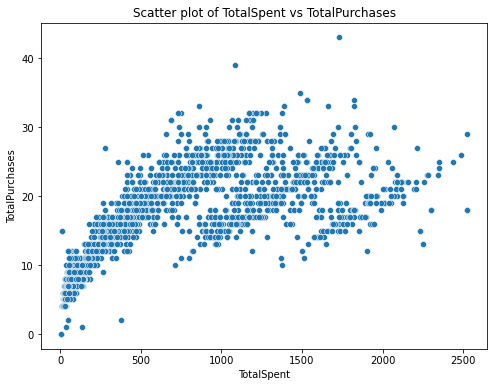

In [73]:
# Scatter plot of TotalSpent vs TotalPurchases
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_Time_Spent', y='TotalPurchases', data=df)
plt.title('Scatter plot of TotalSpent vs TotalPurchases')
plt.xlabel('TotalSpent')
plt.ylabel('TotalPurchases')
plt.show()

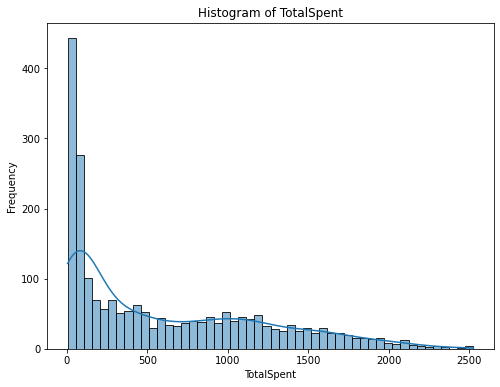

In [74]:
# Histogram of TotalSpent
plt.figure(figsize=(8,6))
sns.histplot(df['Total_Time_Spent'], bins=50, kde=True)
plt.title('Histogram of TotalSpent')
plt.xlabel('TotalSpent')
plt.ylabel('Frequency')
plt.show()

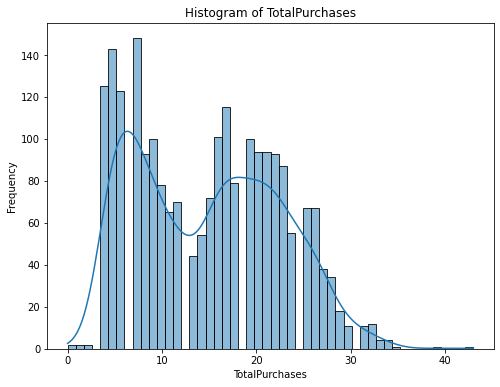

In [75]:
# Histogram of TotalPurchases
plt.figure(figsize=(8,6))
sns.histplot(df['TotalPurchases'], bins=50, kde=True)
plt.title('Histogram of TotalPurchases')
plt.xlabel('TotalPurchases')
plt.ylabel('Frequency')
plt.show()

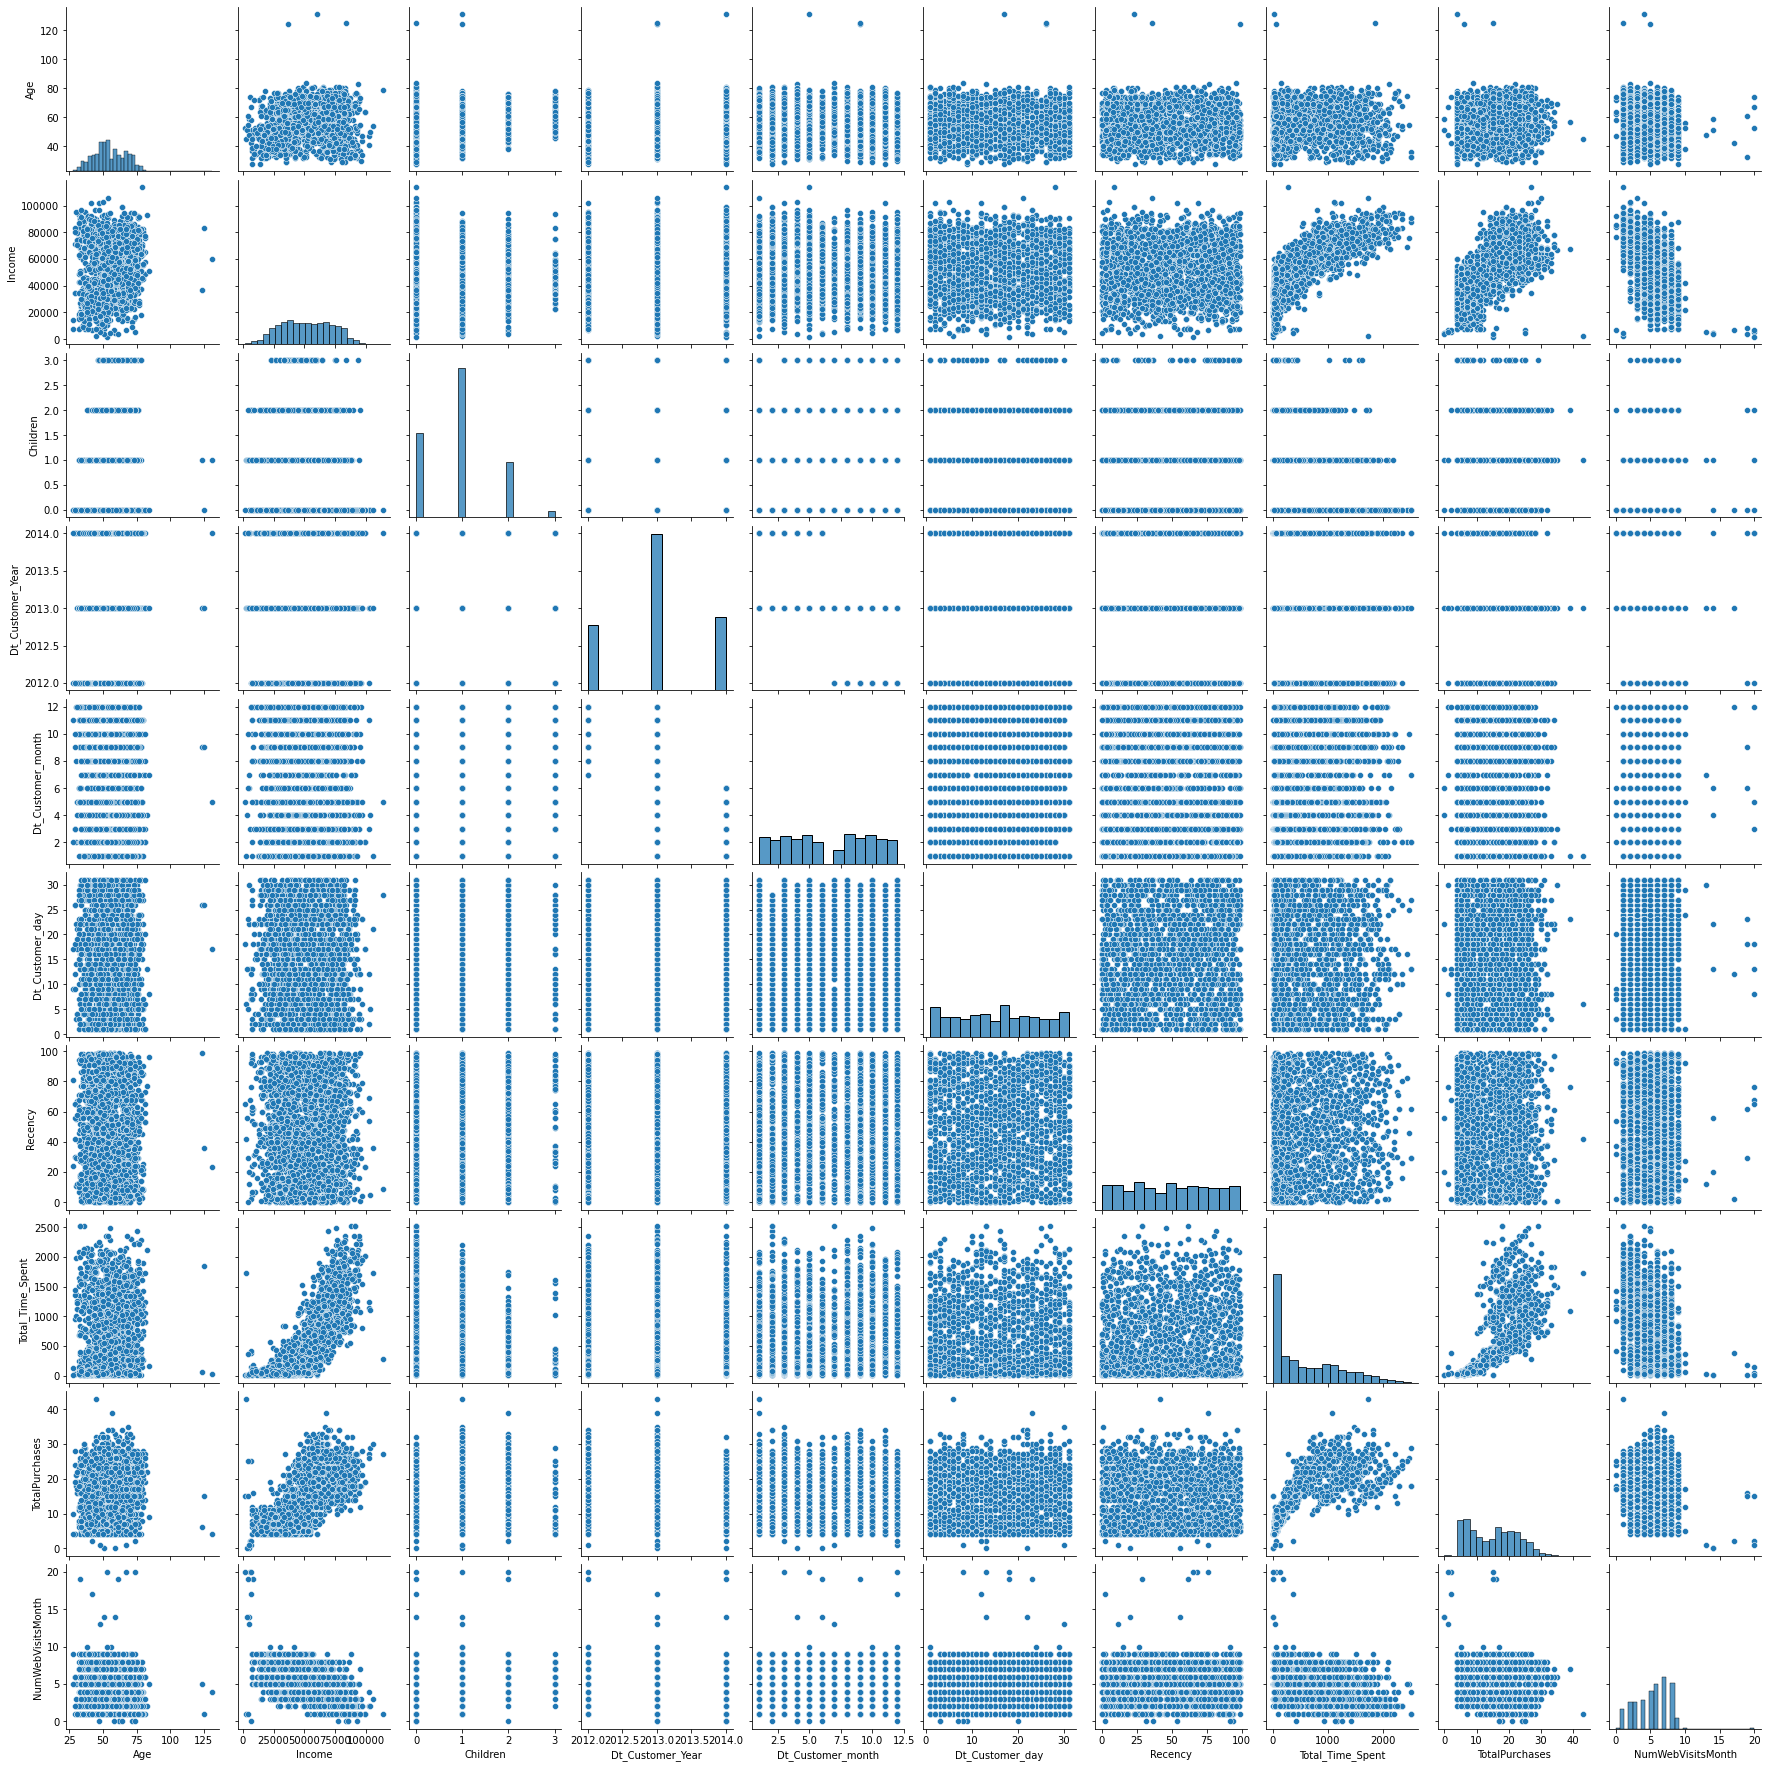

In [76]:
sns.pairplot(data=df)

<AxesSubplot:>

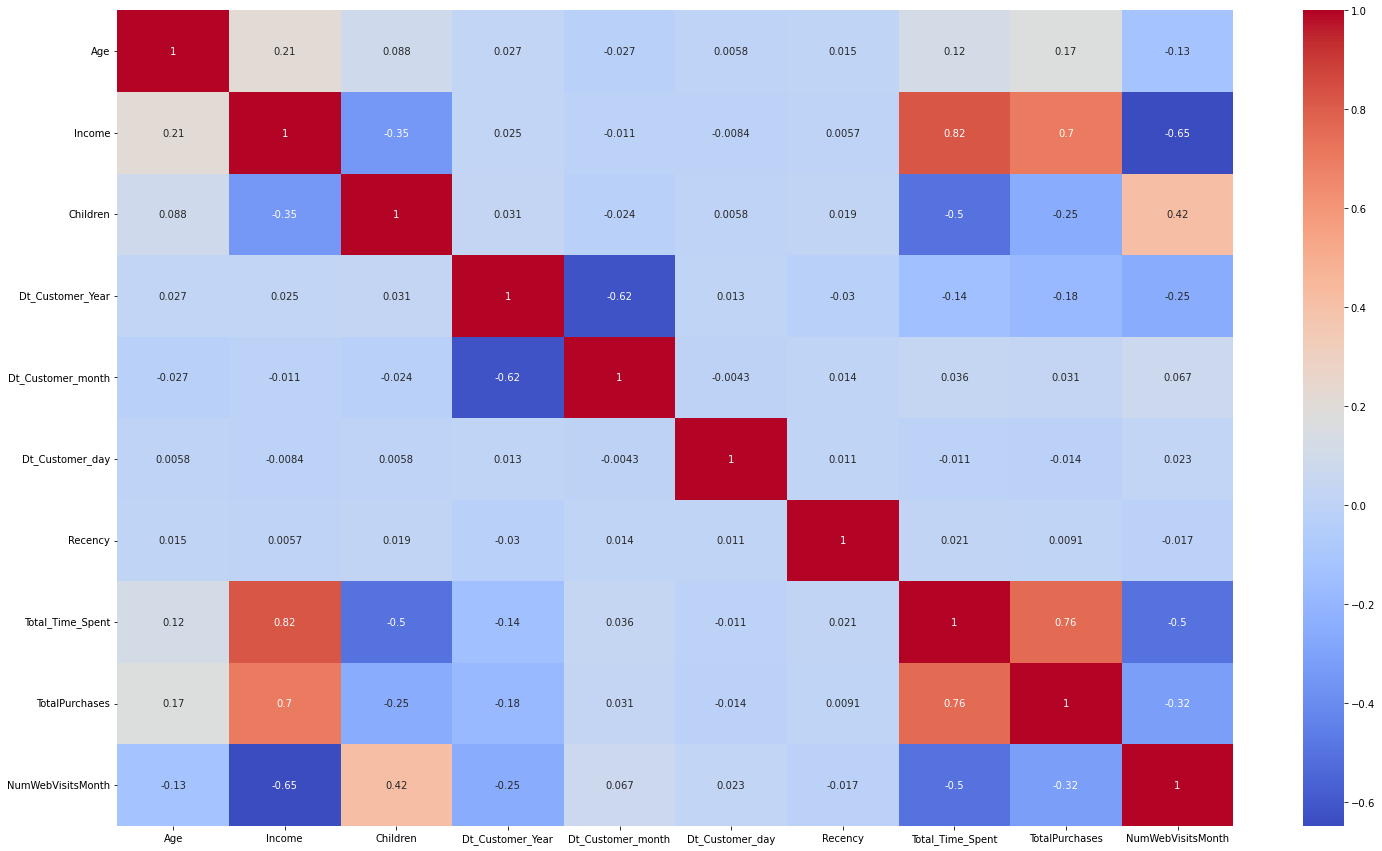

In [77]:
df.corr()
## plot the Correlation matrix
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Data Preprocessing

In [78]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [79]:
# Ordinal Encoder for categorical variables
ordinal_encoder = OrdinalEncoder()

# encode Marital_Status and Education
df['Marital_Status'] = ordinal_encoder.fit_transform(df[['Marital_Status']])
df['Education'] = ordinal_encoder.fit_transform(df[['Education']])


In [80]:
df

,Age,Education,Marital_Status,Income,Children,Dt_Customer_Year,Dt_Customer_month,Dt_Customer_day,Recency,Total_Time_Spent,TotalPurchases,NumWebVisitsMonth
0,67,1.0,4.0,58138.0,0,2012,9,4,58,1617,25,7
1,70,1.0,4.0,46344.0,2,2014,3,8,38,27,6,5
2,59,1.0,5.0,71613.0,0,2013,8,21,26,776,21,4
3,40,1.0,5.0,26646.0,1,2014,2,10,26,53,8,6
4,43,3.0,3.0,58293.0,1,2014,1,19,94,422,19,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,1.0,3.0,61223.0,1,2013,6,13,46,1341,18,5
2236,78,3.0,5.0,64014.0,3,2014,6,10,56,444,22,7
2237,43,1.0,2.0,56981.0,0,2014,1,25,91,1241,19,6
2238,68,2.0,5.0,69245.0,1,2014,1,24,8,843,23,3


In [81]:
# Standard Scaler for all variables
standard_scaler = StandardScaler()

# scale all variables
df_scaled = standard_scaler.fit_transform(df)

# convert scaled data back to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [82]:
# print the scaled values
print("Scaled data:")
print(df_scaled.head())

Scaled data:
        Age  Education  Marital_Status    Income  Children  Dt_Customer_Year  \
0  0.984809  -0.785184        0.254807  0.314089 -1.266476         -1.499248   
1  1.235034  -0.785184        0.254807 -0.255431  1.404373          1.417351   
2  0.317541  -0.785184        1.183211  0.964782 -1.266476         -0.040949   
3 -1.267219  -0.785184        1.183211 -1.206626  0.068949          1.417351   
4 -1.016993   1.074995       -0.673598  0.321573  0.068949          1.417351   

   Dt_Customer_month  Dt_Customer_day   Recency  Total_Time_Spent  \
0           0.724642        -1.331660  0.310588          1.678075   
1          -0.993335        -0.875392 -0.380686         -0.963323   
2           0.438312         0.607479 -0.795450          0.280959   
3          -1.279664        -0.647258 -0.795450         -0.920130   
4          -1.565994         0.379345  1.554881         -0.307126   

   TotalPurchases  NumWebVisitsMonth  
0        1.329209           0.690245  
1       -1.16

In [83]:
df_scaled

,Age,Education,Marital_Status,Income,Children,Dt_Customer_Year,Dt_Customer_month,Dt_Customer_day,Recency,Total_Time_Spent,TotalPurchases,NumWebVisitsMonth
0,0.984809,-0.785184,0.254807,0.314089,-1.266476,-1.499248,0.724642,-1.331660,0.310588,1.678075,1.329209,0.690245
1,1.235034,-0.785184,0.254807,-0.255431,1.404373,1.417351,-0.993335,-0.875392,-0.380686,-0.963323,-1.166113,-0.138499
2,0.317541,-0.785184,1.183211,0.964782,-1.266476,-0.040949,0.438312,0.607479,-0.795450,0.280959,0.803878,-0.552871
3,-1.267219,-0.785184,1.183211,-1.206626,0.068949,1.417351,-1.279664,-0.647258,-0.795450,-0.920130,-0.903448,0.275873
4,-1.016993,1.074995,-0.673598,0.321573,0.068949,1.417351,-1.565994,0.379345,1.554881,-0.307126,0.541212,-0.138499
...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.150724,-0.785184,-0.673598,0.463060,0.068949,-0.040949,-0.134347,-0.305057,-0.104176,1.219569,0.409879,-0.138499
2204,1.902301,1.074995,1.183211,0.597834,2.739797,1.417351,-0.134347,-0.647258,0.241461,-0.270579,0.935210,0.690245
2205,-1.016993,-0.785184,-1.602002,0.258218,-1.266476,1.417351,-1.565994,1.063747,1.451190,1.053443,0.541212,0.275873
2206,1.068217,0.144905,1.183211,0.850434,0.068949,1.417351,-1.565994,0.949680,-1.417597,0.392263,1.066543,-0.967243


# Identify The Which Feature are Importants Using PCA

In [84]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()

In [85]:
pca_data = pca.fit_transform(df_scaled)

In [86]:
#pca_data = pca.fit_transform(df_scaled)

In [87]:
pca_data = pd.DataFrame(pca_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12'])
pca_data

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,1.908162,-1.962058,0.196116,-0.051248,0.753426,0.258341,-1.459566,0.176317,-1.568381,0.292152,-0.155431,0.398403
1,-1.441539,1.967654,1.146032,0.134683,0.405469,-0.334970,-1.431047,-0.652373,0.538784,-0.078295,-0.360497,-0.019650
2,1.645250,-0.231986,-0.490337,0.520582,0.649221,-1.557204,0.019620,-0.326234,-0.202053,0.400945,0.250673,-0.623525
3,-1.825664,1.821806,-1.059955,-0.553414,1.443468,-0.854355,-0.335187,0.632280,0.068512,0.160973,0.214365,0.190024
4,0.137659,1.904710,-0.169675,0.180097,-0.409391,1.795347,1.178919,1.165233,0.080135,0.152120,0.378279,-0.402173
...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1.062997,-0.015494,-0.310839,0.104776,-0.474173,0.189886,-1.039601,0.204428,0.020948,-0.007816,-0.452465,0.532756
2204,-0.299804,0.909422,3.653013,0.326163,0.246167,-0.105964,-0.508460,1.017973,1.076984,1.027474,-0.115200,-0.058136
2205,0.980493,1.728107,-1.970554,1.122671,-1.099848,1.556553,0.227799,0.879555,-1.025938,0.585510,-0.263023,0.227052
2206,1.555880,2.208179,0.959539,0.389398,-0.109184,-2.004298,0.174281,0.492626,0.046966,-0.002822,0.459584,-0.070168


In [88]:
# Print the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)


Explained Variance Ratio: [0.26730372 0.14291252 0.09605147 0.08768068 0.08436651 0.08173696
 0.07634932 0.06299147 0.04917526 0.02341429 0.01802531 0.00999249]


In [89]:
# Get the explained variance ratio for each PC
explained_variance_ratio = pca.explained_variance_ratio_


In [90]:
sum(pca.explained_variance_ratio_)

1.0

In [91]:
pca_data1 = pd.DataFrame({'var':pca.explained_variance_ratio_,'pca_data':['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']})
pca_data1

,var,pca_data
0,0.267304,pc1
1,0.142913,pc2
2,0.096051,pc3
3,0.087681,pc4
4,0.084367,pc5
5,0.081737,pc6
6,0.076349,pc7
7,0.062991,pc8
8,0.049175,pc9
9,0.023414,pc10


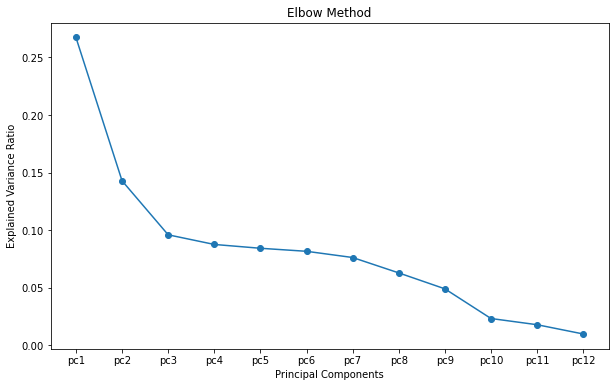

In [92]:
import matplotlib.pyplot as plt

pca_data1 = pd.DataFrame({'var':pca.explained_variance_ratio_,'pca_data':['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']})

plt.figure(figsize=(10,6))
plt.plot(pca_data1['pca_data'], pca_data1['var'], marker='o')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method')
plt.show()

<AxesSubplot:xlabel='pca_data', ylabel='var'>

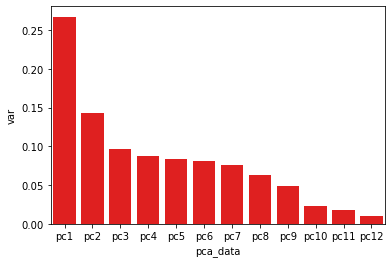

In [93]:
sns.barplot(x='pca_data',y="var",data=pca_data1,color ='red')

# Model Building 

# 1.  PCA

In [94]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_data = pca.fit_transform(df_scaled)

In [95]:
pca_data.shape

(2208, 4)

In [96]:
# Print the explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)


Explained Variance Ratio: [0.26730372 0.14291252 0.09605147 0.08768068]


In [97]:
# Create a DataFram
# Print summary statisticse with the reduced dimensions
pca_data = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3","PC4"])

print(pca_data.describe().T)

      count          mean       std       min       25%       50%       75%  \
PC1  2208.0  1.002620e-16  1.791396 -5.005557 -1.641545 -0.299804  1.554025   
PC2  2208.0 -4.022547e-19  1.309858 -3.354314 -1.009622  0.033102  1.088276   
PC3  2208.0 -3.610236e-17  1.073843 -3.323247 -0.734586 -0.031548  0.718631   
PC4  2208.0 -5.179030e-18  1.025985 -3.502542 -0.708305  0.035511  0.725020   

          max  
PC1  4.100614  
PC2  2.479775  
PC3  5.147376  
PC4  2.590329  


In [98]:
pca_data.head()



,PC1,PC2,PC3,PC4
0,1.908162,-1.962058,0.196116,-0.051248
1,-1.441539,1.967654,1.146032,0.134683
2,1.645250,-0.231986,-0.490337,0.520582
3,-1.825664,1.821806,-1.059955,-0.553414
4,0.137659,1.904710,-0.169675,0.180097


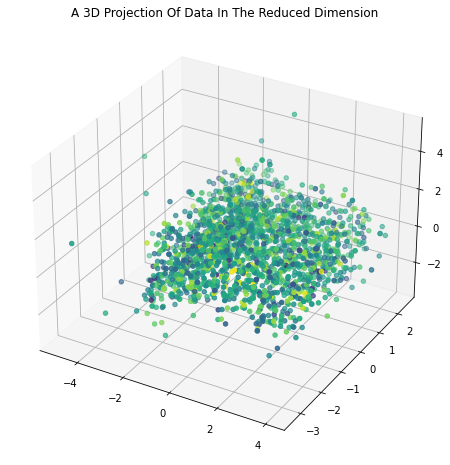

In [99]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_data["PC1"], pca_data["PC2"], pca_data["PC3"], c=pca_data["PC4"], cmap="viridis", marker="o")

ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Construction of Dendogram 

In [100]:
# Construction of Dendogram 
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage


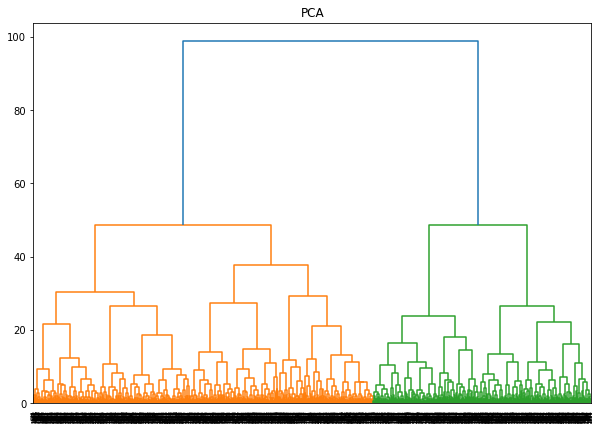

In [101]:

plt.figure(figsize=(10,7))
plt.title('PCA')
dend = shc.dendrogram(shc.linkage(pca_data,method='ward',metric='euclidean'))

# 2. AgglomerativeClustering

In [102]:
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean',linkage='ward',)
agg_labels = agg_clustering.fit_predict(pca_data)


In [103]:
# Create a DataFrame with the cluster labels
cluster_df = pd.DataFrame({'PC1': pca_data['PC1'], 'PC2': pca_data['PC2'], 'PC3': pca_data['PC3'], 'PC4': pca_data['PC4'], 'Cluster': agg_labels})

# Print the cluster labels
print(cluster_df['Cluster'].value_counts())

0    725
1    620
3    445
2    418
Name: Cluster, dtype: int64


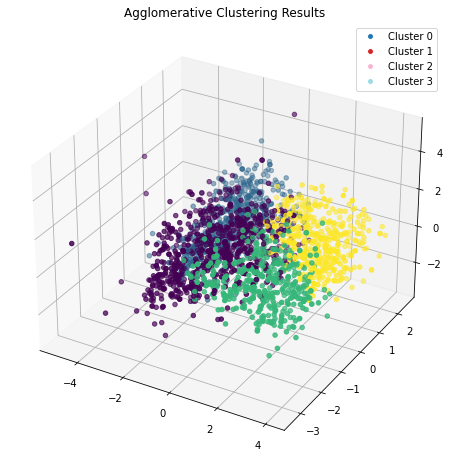

In [104]:
# 3D Projection of Agglomerative Clustering Results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(cluster_df['PC1'], cluster_df['PC2'], cluster_df['PC3'], c=agg_labels)
ax.set_title("Agglomerative Clustering Results")

ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i}", markerfacecolor=plt.cm.tab20(i / max(agg_labels))) for i in np.unique(agg_labels)])

plt.show()

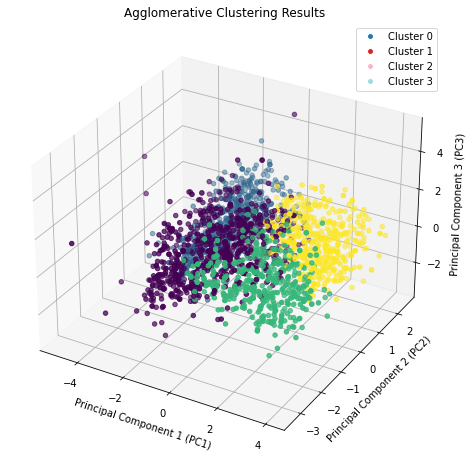

In [105]:
# 3D Projection of Agglomerative Clustering Results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(cluster_df['PC1'], cluster_df['PC2'], cluster_df['PC3'], c=agg_labels)

ax.set_xlabel("Principal Component 1 (PC1)")
ax.set_ylabel("Principal Component 2 (PC2)")
ax.set_zlabel("Principal Component 3 (PC3)")
ax.set_title("Agglomerative Clustering Results")

ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i}", markerfacecolor=plt.cm.tab20(i / max(agg_labels))) for i in np.unique(agg_labels)])

plt.show()

# 3. KMeans

In [106]:
from sklearn.cluster import KMeans

# Assume cluster_df is your DataFrame with PC1, PC2, and PC3 PC4 columns

# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_data[['PC1', 'PC2', 'PC3','PC4']])


KMeans(n_clusters=4, random_state=42)

In [107]:
# Get the cluster labels
labels = kmeans.labels_

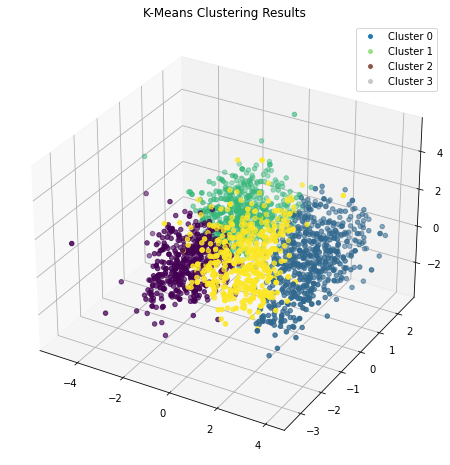

In [108]:
import matplotlib.pyplot as plt

# Plot the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=labels)
ax.set_title("K-Means Clustering Results")
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i}", markerfacecolor=plt.cm.tab20(i / 4)) for i in range(4)])
plt.show()



# 4. DBSCAN

In [109]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to your data
dbscan_model.fit(pca_data)

# Get the cluster labels
labels = dbscan_model.labels_

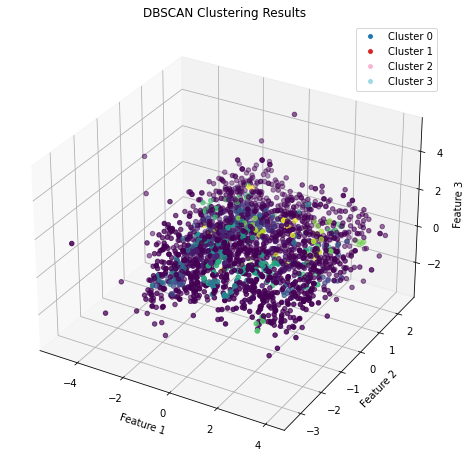

In [110]:
# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=labels)

# Set the axis labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Set the title
ax.set_title('DBSCAN Clustering Results')
ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {i}", markerfacecolor=plt.cm.tab20(i / max(agg_labels))) for i in np.unique(agg_labels)])

# Show the plot
plt.show()

In [111]:
pca_data.to_csv('pca_data.csv', index=False)

In [112]:
pca_data

,PC1,PC2,PC3,PC4
0,1.908162,-1.962058,0.196116,-0.051248
1,-1.441539,1.967654,1.146032,0.134683
2,1.645250,-0.231986,-0.490337,0.520582
3,-1.825664,1.821806,-1.059955,-0.553414
4,0.137659,1.904710,-0.169675,0.180097
...,...,...,...,...
2203,1.062997,-0.015494,-0.310839,0.104776
2204,-0.299804,0.909422,3.653013,0.326163
2205,0.980493,1.728107,-1.970554,1.122671
2206,1.555880,2.208179,0.959539,0.389398


# Model Evaluation

In [113]:
from sklearn.metrics import silhouette_score

silhouette_agg = silhouette_score(pca_data, agg_labels)
silhouette_kmeans = silhouette_score(pca_data, kmeans.labels_)
silhouette_dbscan = silhouette_score(pca_data, labels)

print("Agglomerative Clustering Silhouette Score:", silhouette_agg)
print("K-Means Clustering Silhouette Score:", silhouette_kmeans)
print("DBSCAN Clustering Silhouette Score:", silhouette_dbscan)

Agglomerative Clustering Silhouette Score: 0.16188648833955474
K-Means Clustering Silhouette Score: 0.219430555578182
DBSCAN Clustering Silhouette Score: -0.3945502473638183


Text(0.5, 1.0, 'Silhouette Scores for Different Clustering Algorithms')

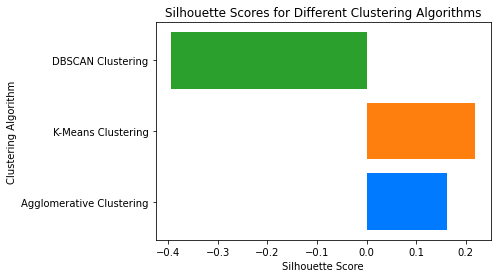

In [114]:
silhouette_scores = [silhouette_agg, silhouette_kmeans, silhouette_dbscan]
clustering_algorithms = ['Agglomerative Clustering', 'K-Means Clustering', 'DBSCAN Clustering']

# Use a horizontal bar chart with custom colors
plt.barh(clustering_algorithms, silhouette_scores, color=['#007bff', '#ff7f0e', '#2ca02c'])
plt.xlabel('Silhouette Score')
plt.ylabel('Clustering Algorithm')
plt.title('Silhouette Scores for Different Clustering Algorithms')


# Save in Pickle File

In [141]:
import pickle
# Save the model to a file
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)


# CONCLUSION

In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.